The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64

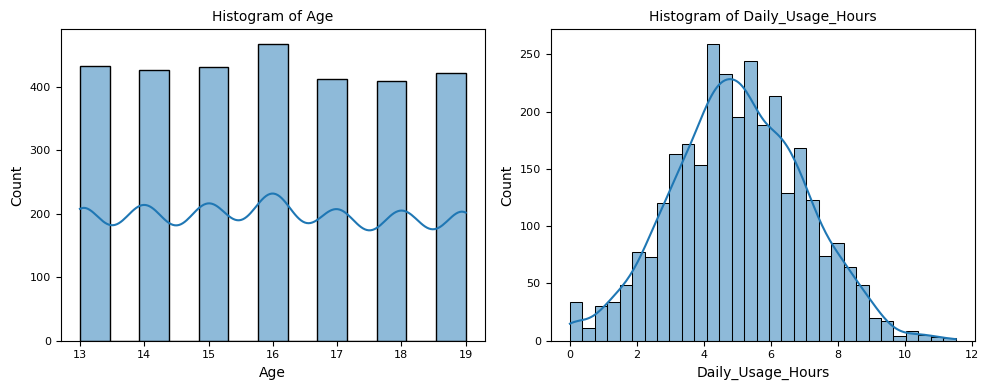

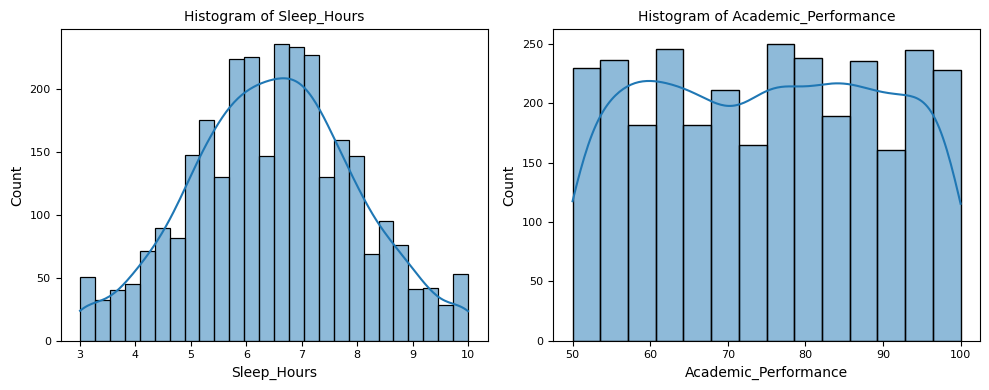

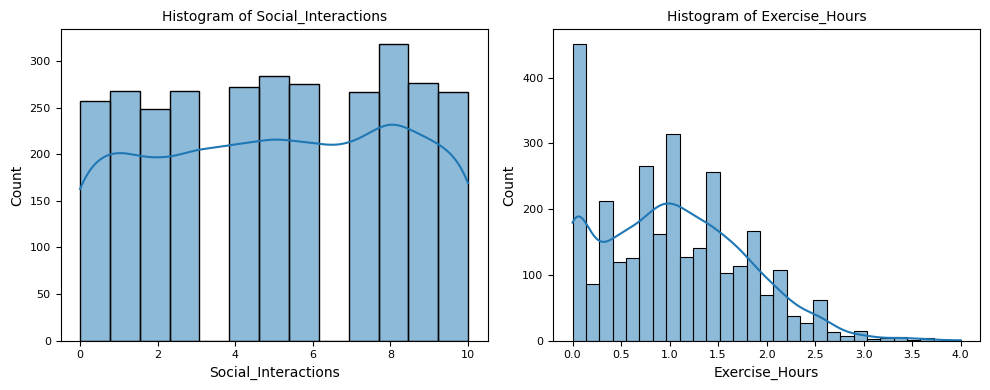

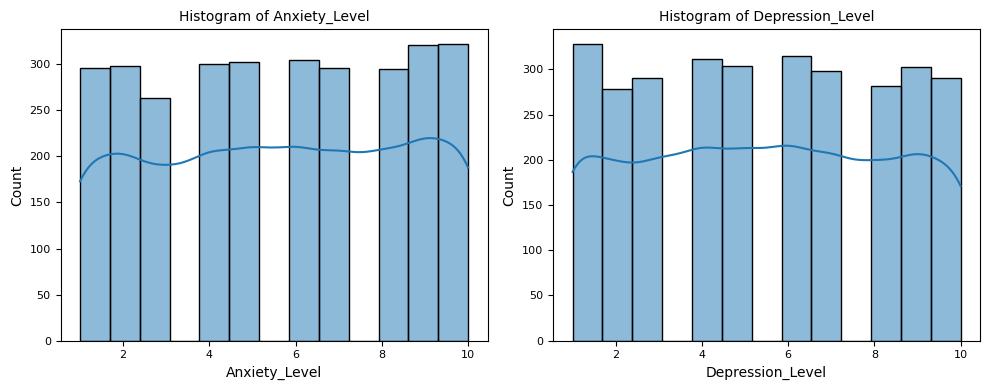

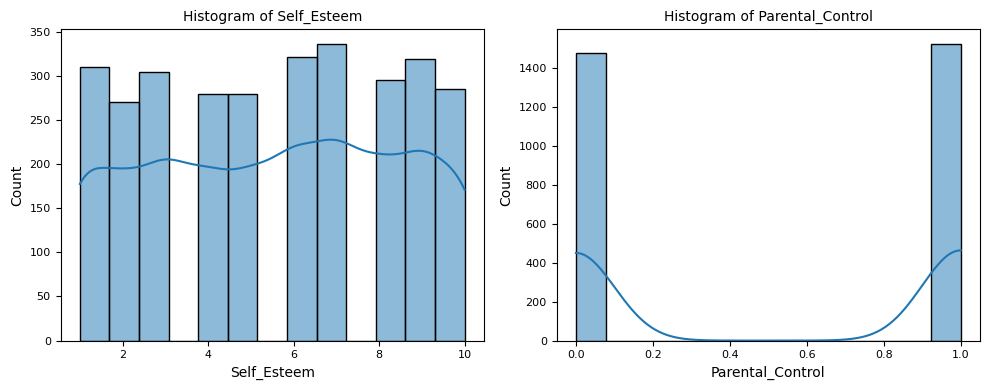

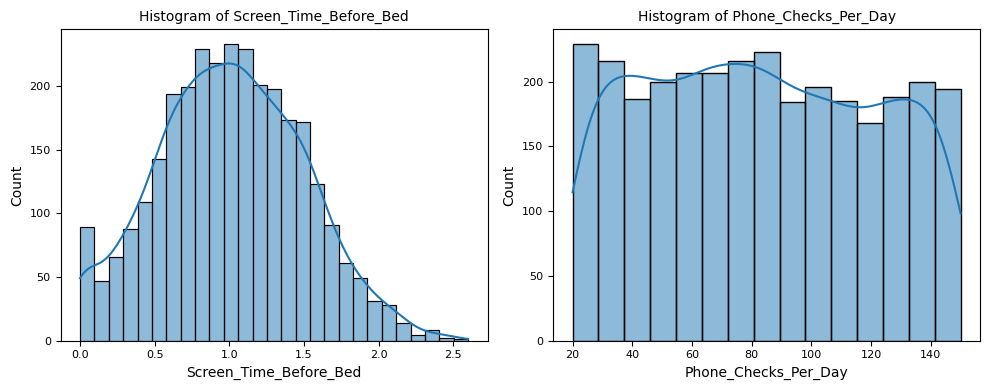

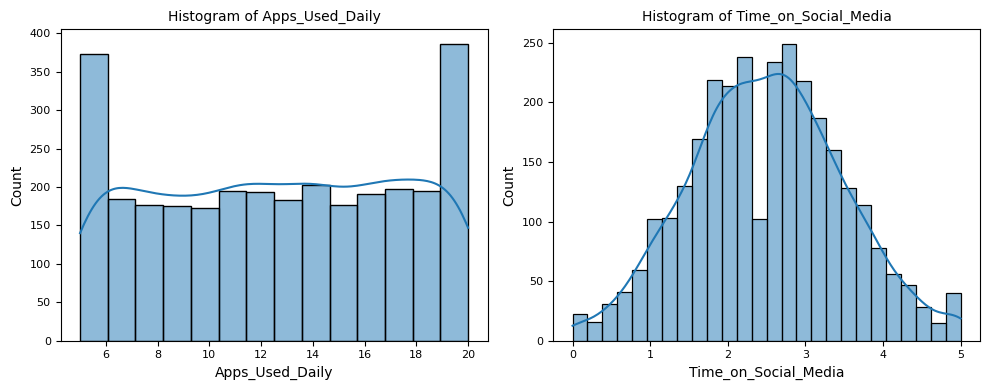

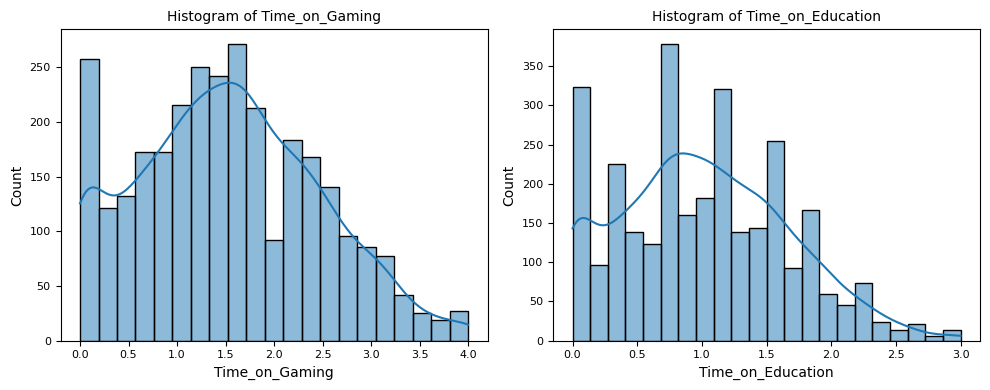

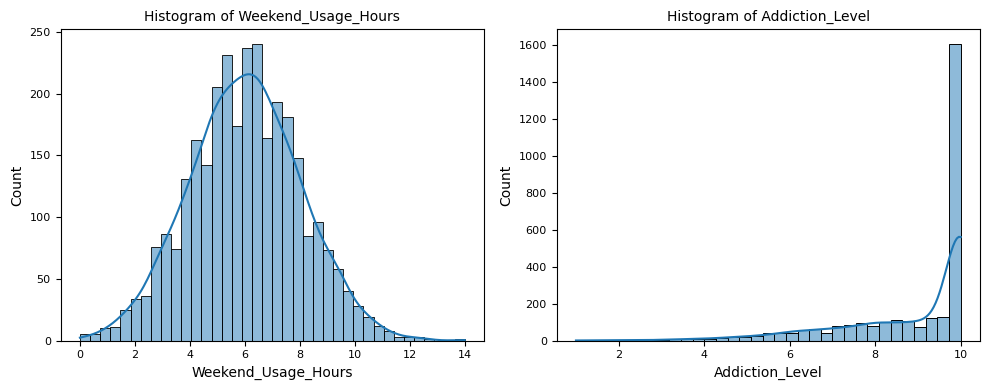

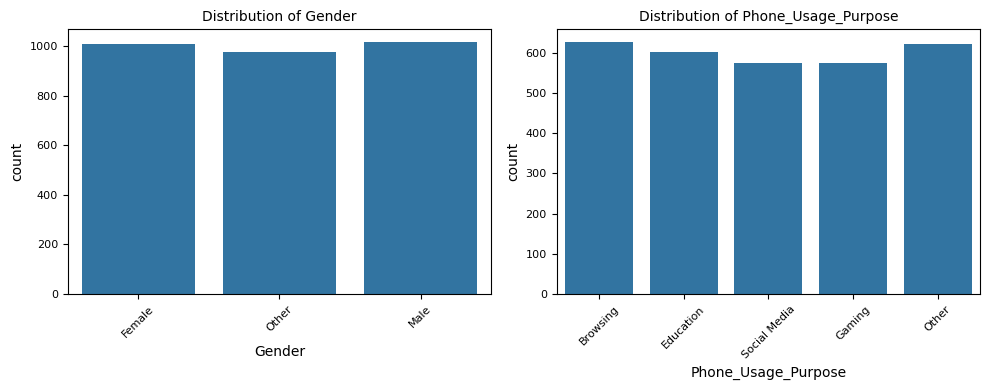

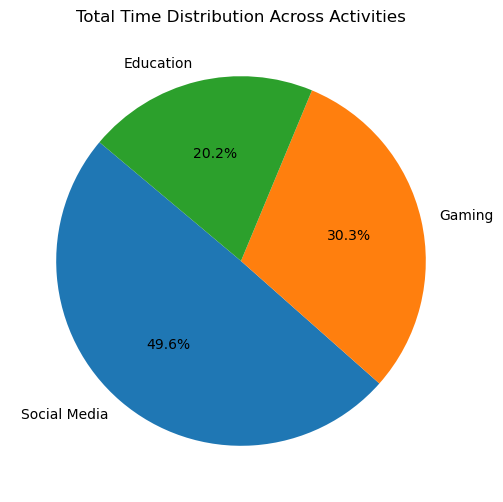

In [74]:
%run ./EDA.ipynb

In [75]:
import joblib

df_final = joblib.load("processed_data.joblib")

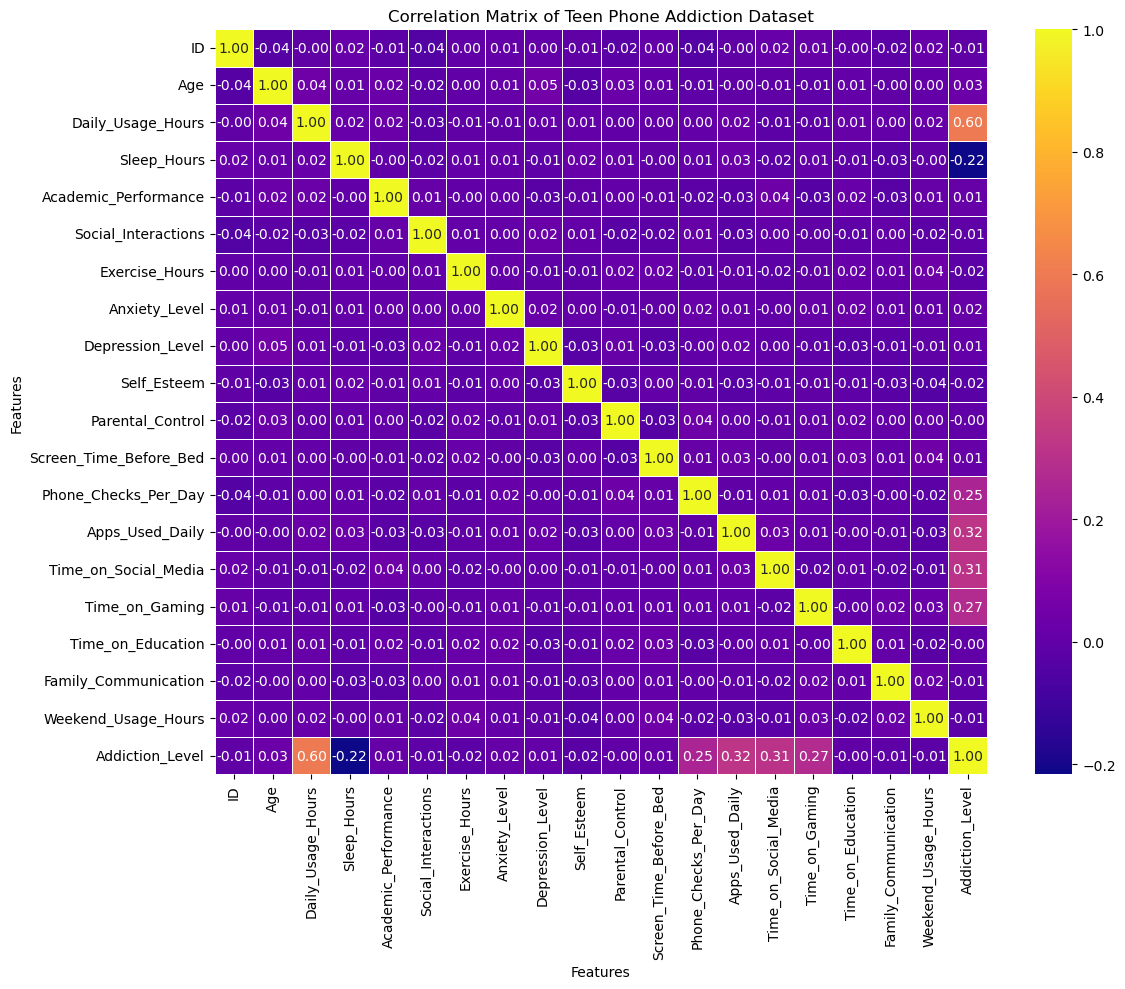

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix for numeric columns
correlation_matrix = df.corr(numeric_only=True) # 📊 Compute numeric correlations (-1 to 1)

# Plot the heatmap
plt.figure(figsize=(12, 10))# 🖼️ Set figure size
sns.heatmap(correlation_matrix, #  Heatmap with values
            annot=True,
            fmt=".2f", 
            cmap="plasma", 
            linewidths=0.5)
plt.title("Correlation Matrix of Teen Phone Addiction Dataset")
plt.xlabel("Features")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

Insights from Heatmap

🔺 High positive correlation: Daily_Usage_Hours ↔ Addiction_Level → more usage = more addiction

🔻 Negative correlation: Sleep_Hours ↔ Daily_Usage_Hours → more phone = less sleep

⚖️ Weak correlation: Some features like Age may not affect addiction much

🎓 Academic impact: Daily_Usage_Hours ↔ Academic_Performance (if negative) → heavy phone use may lower performance

💡 Use strong correlations to select important features for modeling

In [78]:
# X = all features, y = target
X = df_final.drop(columns=['target', 'target_encoded', 'Addiction_Level']) # 🚫 Drop target columns
y = df_final['target_encoded']  # 🎯 Target variable

# Compute absolute correlation matrix
corr_matrix = X.corr().abs()

# Upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation > 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

# Drop them (if any)
X_filtered = X.drop(columns=to_drop) if to_drop else X.copy()

print("Dropped due to high correlation:", to_drop)
print("Remaining columns:", X_filtered.shape[1])

Dropped due to high correlation: []
Remaining columns: 27


What the code does

- Split data: X = features, y = target 🎯

- Compute correlations: corr_matrix = X.corr().abs() 📊

- Check only upper triangle to avoid duplicates 🔺

- Find highly correlated features (>0.85) ⚠️

- Drop them to reduce redundancy ✂️

- Print summary: shows dropped and remaining columns 📝

⚡ Why: Removes redundant features that are highly correlated, preventing multicollinearity.

✅ Effect: Simplifies the model, reduces overfitting, and improves interpretability.

📌 Output:

- Dropped due to high correlation → list of features removed

- Remaining columns → features left for modeling

Removing highly correlated features helps:

- Reduce multicollinearity

- Simplify the model

- Improve stability and interpretability

In [80]:
# X = all features, y = target
X = df_final.drop(columns=['target', 'target_encoded', 'Addiction_Level']) # 🚫 Drop target columns
y = df_final['target_encoded']  # 🎯 Target variable

# Compute absolute correlation matrix
corr_matrix = X.corr().abs()

# Upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation > 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

# Drop them (if any)
X_filtered = X.drop(columns=to_drop) if to_drop else X.copy()

print("Dropped due to high correlation:", to_drop)
print("Remaining columns:", X_filtered.shape[1])

Dropped due to high correlation: []
Remaining columns: 27


What the code does

- Split data: X = features, y = target 🎯

- Compute correlations: corr_matrix = X.corr().abs() 📊

- Check only upper triangle to avoid duplicates 🔺

- Find highly correlated features (>0.85) ⚠️

- Drop them to reduce redundancy ✂️

- Print summary: shows dropped and remaining columns 📝

⚡ Why: Removes redundant features that are highly correlated, preventing multicollinearity.

✅ Effect: Simplifies the model, reduces overfitting, and improves interpretability.

📌 Output:

- Dropped due to high correlation → list of features removed

- Remaining columns → features left for modeling

Removing highly correlated features helps:

- Reduce multicollinearity

- Simplify the model

- Improve stability and interpretability

In [82]:
from sklearn.ensemble import RandomForestClassifier

# Embedded method (feature importance)
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_filtered, y)

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_filtered.columns, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance_df.head(10))

# Select features with importance > 0.01
selected_features = feature_importance_df[feature_importance_df['Importance'] > 0.01]['Feature'].tolist()

# Create final X for training
X_final = X_filtered[selected_features]

print("Selected Features for X_train:", selected_features)
print("Shape of X_final:", X_final.shape)

                 Feature  Importance
1      Daily_Usage_Hours    0.307491
12       Apps_Used_Daily    0.100357
11  Phone_Checks_Per_Day    0.094044
14        Time_on_Gaming    0.079841
13  Time_on_Social_Media    0.074166
2            Sleep_Hours    0.069961
17   Weekend_Usage_Hours    0.029412
3   Academic_Performance    0.026685
5         Exercise_Hours    0.024738
15     Time_on_Education    0.022249
Selected Features for X_train: ['Daily_Usage_Hours', 'Apps_Used_Daily', 'Phone_Checks_Per_Day', 'Time_on_Gaming', 'Time_on_Social_Media', 'Sleep_Hours', 'Weekend_Usage_Hours', 'Academic_Performance', 'Exercise_Hours', 'Time_on_Education', 'Depression_Level', 'Screen_Time_Before_Bed', 'Age', 'Self_Esteem', 'Family_Communication', 'Social_Interactions', 'Anxiety_Level', 'School_Grade_Num']
Shape of X_final: (3000, 18)


What the code does

- Train Random Forest on filtered features 🎯

- Get feature importances from the model 📊

- Sort and print top 10 features 🔝

- Keep features with importance > 0.01 ✂️

- Create X_final with selected important features ✅

Insight

- This embedded method uses the Random Forest model itself to measure feature importance, so the selection is based on how much each feature contributes to predicting the target.

- By keeping only features with importance > 0.01, we remove weak or irrelevant features, reducing noise in the dataset.

- This helps improve model accuracy, training speed, and stability, while making the model easier to interpret.

- It’s an automatic, data-driven way to select features rather than relying solely on manual selection.

In [86]:
from sklearn.model_selection import train_test_split
# X_final = selected features
# y = target
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, stratify=y, random_state=42)

- Splits the dataset into training and testing sets.

- X_final = selected important features, y = target.

- test_size=0.2 → 20% of data for testing, 80% for training.

- random_state=42 → ensures reproducibility of the split.

- stratify=y → keeps the same class distribution in train and test sets.

- Use stratified train/test split to ensure all classes appear in test set properly.

Insight

- Prepares the data for model training and evaluation.

- Ensures balanced representation of classes in both sets, which is crucial for imbalanced datasets.

- Helps assess model performance on unseen data reliably.

In [93]:
print(y_train.value_counts()) # Count of each class in training set
print(y_test.value_counts())

target_encoded
2.0    2043
1.0     346
0.0      11
Name: count, dtype: int64
target_encoded
2.0    511
1.0     86
0.0      3
Name: count, dtype: int64


Insight

🔹 Shows how many samples belong to each class in train and test sets.

⚖️ Ensures stratification worked → class distribution is similar in both sets.

✅ Important for imbalanced datasets, so the model sees all classes fairly.

In [96]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: target_encoded
2.0    2043
1.0     346
0.0      11
Name: count, dtype: int64
After SMOTE: target_encoded
2.0    2043
1.0    2043
0.0    2043
Name: count, dtype: int64


- Uses SMOTE to create synthetic samples for minority classes in X_train and y_train.

- Balances the training data without touching the test set.

- Applies SMOTE on the training set:

    - fit_resample() generates new synthetic samples for the minority class(es).
    
    - Returns:
    
        - X_train_res → new training features including synthetic samples
        
        - y_train_res → new training labels with balanced classes

🔹 Note: Only apply SMOTE on the training set, not on the test set. The test set must remain real data for proper evaluation.

💡 Insight

- SMOTE solves class imbalance, which is common in classification problems.

- By creating synthetic samples, it allows the model to learn all classes equally.

- Helps improve model performance, especially for minority classes, and prevents bias toward the majority class.

In [99]:
import joblib

# Save both variables together in a dictionary
joblib.dump(
    {"X_train_res": X_train_res, "y_train_res": y_train_res, "X_test": X_test, "y_test": y_test},
    "resampled_data.joblib"
)

print("✅ Resampled data saved successfully!")

✅ Resampled data saved successfully!
